## Neural Net

In [ ]:
import torch.nn as nn
import pandas as pd
import numpy as np
import torch.optim as optim
from matplotlib import pyplot as plt

## Set up the network

In [ ]:
''' 
This code sets up the neural network.  Through trial-and-error, this 
architecure was optimized to the final model. We found that two hidden layers
and not using dropout performed the best.  The number of nodes in hidden
layers was tested in the training code below.
'''
class Net(nn.Module):
  def __init__(self, input_nodes, hidden_nodes):
    super(Net, self).__init__()

    self.first_layer = nn.Linear(input_nodes, hidden_nodes[0])
    self.second_layer = nn.Linear(hidden_nodes[0], hidden_nodes[1])
    # self.third_layer = nn.Linear(hidden_nodes[1], hidden_nodes[2])
    self.out = nn.Linear(hidden_nodes[1], 4)
    # self.dropout = nn.Dropout(0.5)
    # self.dropout2 = nn.Dropout(0.2)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.first_layer(x))
    # x = self.dropout(x)
    # x = self.dropout2(x)
    x = self.relu(self.second_layer(x))
    # x = self.relu(self.third_layer(x))
    x = self.out(x)
    return x


## Import and set up the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
''' This dictionary is used to convert the categorical variables to integers '''
classes = {'luminalA': 0,
           'luminalB': 1,
           'her2Enriched': 2,
           'tripleNegative': 3}

## Training for architecture

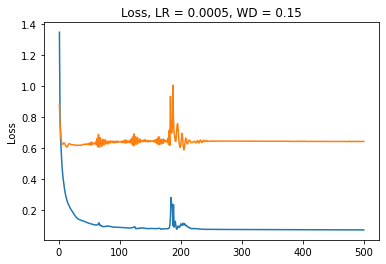

Train acc: 100.0, loss: 0.07411761581897736 
 Val acc: 78.41726618705036, val loss: 0.6446253657341003
Val accuracy with LR = 0.0005 and WD = 0.15: 
 78.41726618705036


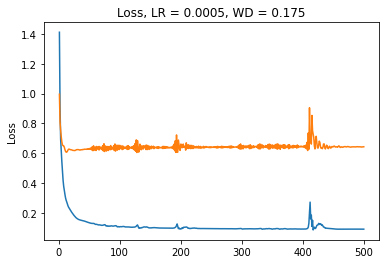

Train acc: 100.0, loss: 0.08989249169826508 
 Val acc: 77.6978417266187, val loss: 0.6429460644721985
Val accuracy with LR = 0.0005 and WD = 0.175: 
 77.6978417266187


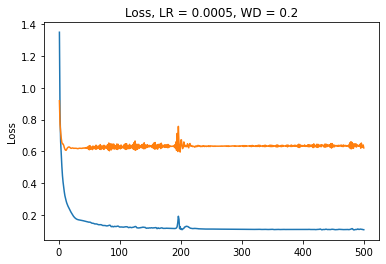

Train acc: 99.38080495356037, loss: 0.10692884773015976 
 Val acc: 79.13669064748201, val loss: 0.6216152310371399
Val accuracy with LR = 0.0005 and WD = 0.2: 
 79.13669064748201


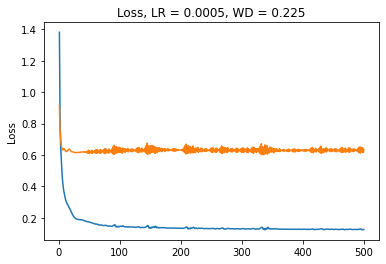

Train acc: 99.07120743034056, loss: 0.12624111771583557 
 Val acc: 78.41726618705036, val loss: 0.6346173882484436
Val accuracy with LR = 0.0005 and WD = 0.225: 
 78.41726618705036


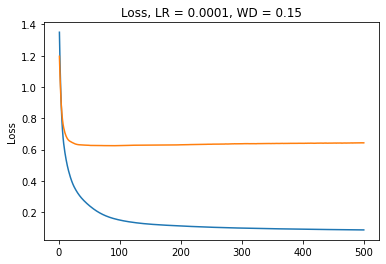

Train acc: 99.84520123839009, loss: 0.0869152769446373 
 Val acc: 79.13669064748201, val loss: 0.6435189247131348
Val accuracy with LR = 0.0001 and WD = 0.15: 
 79.13669064748201


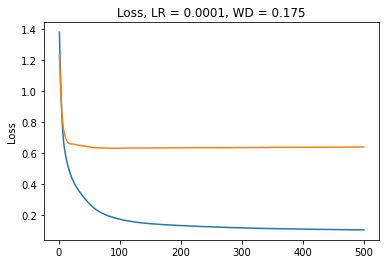

Train acc: 99.69040247678019, loss: 0.10560817271471024 
 Val acc: 79.13669064748201, val loss: 0.6403396129608154
Val accuracy with LR = 0.0001 and WD = 0.175: 
 79.13669064748201


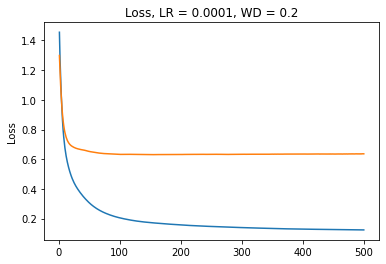

Train acc: 99.69040247678019, loss: 0.12358187884092331 
 Val acc: 79.13669064748201, val loss: 0.6362617015838623
Val accuracy with LR = 0.0001 and WD = 0.2: 
 79.13669064748201


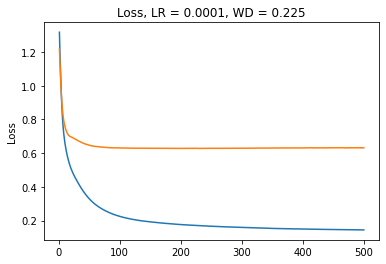

Train acc: 99.07120743034056, loss: 0.14424461126327515 
 Val acc: 79.13669064748201, val loss: 0.6311615705490112
Val accuracy with LR = 0.0001 and WD = 0.225: 
 79.13669064748201


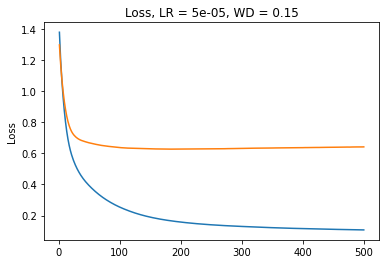

Train acc: 99.53560371517028, loss: 0.10734300315380096 
 Val acc: 79.13669064748201, val loss: 0.6412189602851868
Val accuracy with LR = 5e-05 and WD = 0.15: 
 79.13669064748201


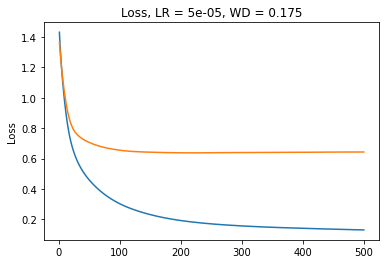

Train acc: 99.69040247678019, loss: 0.13007088005542755 
 Val acc: 78.41726618705036, val loss: 0.6429777145385742
Val accuracy with LR = 5e-05 and WD = 0.175: 
 78.41726618705036


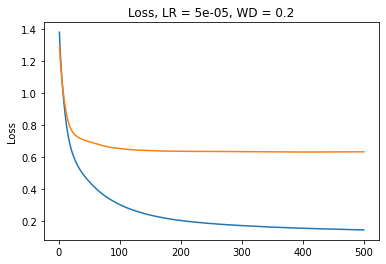

Train acc: 99.22600619195046, loss: 0.1451883763074875 
 Val acc: 80.57553956834532, val loss: 0.6337382197380066
Val accuracy with LR = 5e-05 and WD = 0.2: 
 80.57553956834532


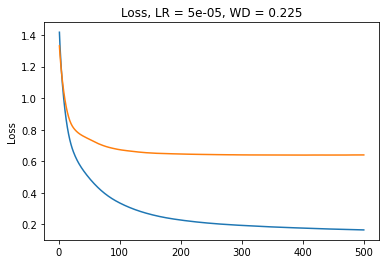

Train acc: 98.60681114551083, loss: 0.16560541093349457 
 Val acc: 79.85611510791367, val loss: 0.6405556797981262
Val accuracy with LR = 5e-05 and WD = 0.225: 
 79.85611510791367


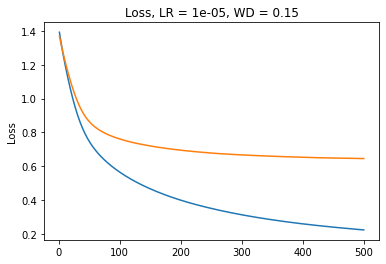

Train acc: 97.36842105263158, loss: 0.2239215075969696 
 Val acc: 78.41726618705036, val loss: 0.6454564929008484
Val accuracy with LR = 1e-05 and WD = 0.15: 
 78.41726618705036


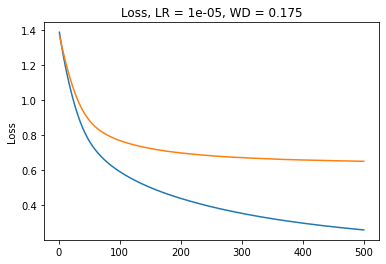

Train acc: 95.82043343653251, loss: 0.25683164596557617 
 Val acc: 81.29496402877697, val loss: 0.6500146985054016
Val accuracy with LR = 1e-05 and WD = 0.175: 
 81.29496402877697


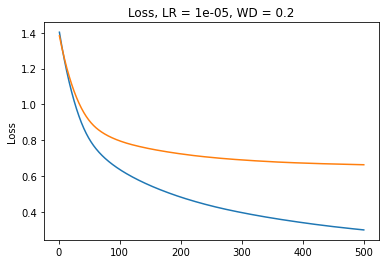

Train acc: 93.80804953560371, loss: 0.300423264503479 
 Val acc: 80.57553956834532, val loss: 0.6638568639755249
Val accuracy with LR = 1e-05 and WD = 0.2: 
 80.57553956834532


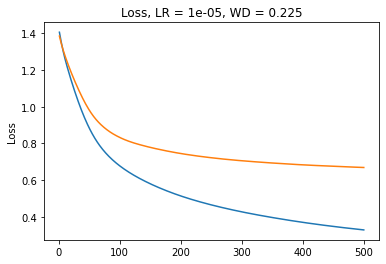

Train acc: 92.41486068111455, loss: 0.328302264213562 
 Val acc: 80.57553956834532, val loss: 0.6688410043716431
Val accuracy with LR = 1e-05 and WD = 0.225: 
 80.57553956834532


In [ ]:
''' 
This code was used to initially optimize the architecture of the model.  
Here, we adjusted: number of epochs, number of hidden layers and nodes, 
hyperparameter grids.
The output shows final training and validation loss and accuracy, as well as 
loss plots.
'''
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# grids of hyperparameters to search
lrs = [5e-4, 1e-4, 5e-5, 1e-5]
# lrs = [5e-2, 1e-2, 5e-3, 1e-3]
wds = [0.15, 0.175, 0.2, 0.225]

# read in data and reformat 
## Train ##
train = pd.read_csv("/content/drive/My Drive/cv_data/train_1.csv")
# label data 
train_y_int = train['category'].to_numpy()
# convert the classes to integers
train_y = np.empty(train_y_int.size, dtype=int)
for key, val in classes.items():
  train_y[train_y_int == key] = val
# expression data as x
train_x = train.iloc[:,3:].to_numpy()

## Validation ##
valid = pd.read_csv("/content/drive/My Drive/cv_data/val_1.csv")
# label data 
val_y_int = valid['category'].to_numpy()
# convert the classes to integers
val_y = np.empty(val_y_int.size, dtype=int)
for key, val in classes.items():
  val_y[val_y_int == key] = val
# expression data as x
val_x = valid.iloc[:,3:].to_numpy()

# set up data for GPU
x_tr = torch.from_numpy(train_x).float().to(device)
y_tr = torch.from_numpy(train_y).to(device)  

x_v = torch.from_numpy(val_x).float().to(device)
y_v = torch.from_numpy(val_y).to(device)

for lr in lrs:
  for wd in wds:
    model = Net(input_nodes=train_x.shape[1], hidden_nodes=[200, 200]).to(device)

    ## Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

    epochs = 500
    val_acc = []
    train_acc = []
    train_loss = []
    val_loss = []

    for epoch in range(epochs):
      model.train()
      # zero the parameter gradients
      optimizer.zero_grad()
      # forward + backward + optimize
      # forward
      y_pred = model(x_tr)
      loss = criterion(y_pred, y_tr)
      # backward
      loss.backward()
      # optimize
      optimizer.step()

      # store train loss and accuracy
      train_loss.append(loss.item())
      _, pred = torch.max(y_pred.data, 1)
      train_acc.append(100 * sum(pred.eq(y_tr)).item() / y_tr.size(0))
    
    # print("Train accuracy with LR = {} and WD = {}: \n".format(lr, wd), train_acc[epochs-1])
      with torch.no_grad():
        model.eval()
        outputs = model(x_v)
        _, pred = torch.max(outputs.data, 1)
        val_acc.append(100 * sum(pred.eq(y_v)).item() / y_v.size(0))
        val_loss.append(criterion(outputs, y_v).item())
    
    # plotting
    plt.plot(np.linspace(1, 500, 500), train_loss, label='Train')
    plt.plot(np.linspace(1, 500, 500), val_loss, label='Val')
    plt.title("Loss, LR = {}, WD = {}".format(lr, wd))
    plt.ylabel('Loss')
    plt.show()  
    print("Train acc: {}, loss: {} \n Val acc: {}, val loss: {}".format(train_acc[499], train_loss[499], val_acc[499], val_loss[499]))
    print("Val accuracy with LR = {} and WD = {}: \n".format(lr, wd), 100 * sum(pred.eq(y_v)).item() / y_v.size(0))


## Run full model: Train, find best hyperparameters, get test performance for each data split

In [ ]:
'''
This code runs the full hyperparameter optimization, retrains the model with
the optimal hyperparameters, and gets performace measures from the test dataset
for each fold. 
'''
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# grids of hyperparameters to search
lrs = [5e-4, 1e-4, 5e-5, 1e-5]
wds = [0.15, 0.175, 0.2, 0.225]

for i in range(1,6):
  ###########################
  ## Read in and prep data ##
  ###########################

  ## Train ##
  train = pd.read_csv("/content/drive/My Drive/cv_data/train_{}.csv".format(i))
  # label data 
  train_y_int = train['category'].to_numpy()
  # convert the classes to integers
  train_y = np.empty(train_y_int.size, dtype=int)
  for key, val in classes.items():
    train_y[train_y_int == key] = val
  # expression data as x
  train_x = train.iloc[:,3:].to_numpy()

  ## Validation ##
  valid = pd.read_csv("/content/drive/My Drive/cv_data/val_{}.csv".format(i))
  # label data 
  val_y_int = valid['category'].to_numpy()
  # convert the classes to integers
  val_y = np.empty(val_y_int.size, dtype=int)
  for key, val in classes.items():
    val_y[val_y_int == key] = val
  # expression data as x
  val_x = valid.iloc[:,3:].to_numpy()

  ## Test ##
  test = pd.read_csv("/content/drive/My Drive/cv_data/test_{}.csv".format(i))
  # label data 
  test_y_int = test['category'].to_numpy()
  # convert the classes to integers
  test_y = np.empty(test_y_int.size, dtype=int)
  for key, val in classes.items():
    test_y[test_y_int == key] = val
  # expression data as x
  test_x = test.iloc[:,3:].to_numpy()


  ## Set up data for GPU ##
  x_tr = torch.from_numpy(train_x).float().to(device)
  y_tr = torch.from_numpy(train_y).to(device)  

  x_v = torch.from_numpy(val_x).float().to(device)
  y_v = torch.from_numpy(val_y).to(device)

  #########################################
  ## Finding the optimal hyperparameters ##
  #########################################

  ## for storing optimal hyperparameters ##
  best_loss = float('inf')
  opt_lr = 0
  opt_wd = 0

  for lr in lrs:
    for wd in wds:
      ## set up model parameters ##
      model = Net(input_nodes=train_x.shape[1], hidden_nodes=[200, 200]).to(device)
      # Loss function and optimizer
      criterion = nn.CrossEntropyLoss()
      optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
      epochs = 100

      ## Train model ##
      for epoch in range(epochs):
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        # forward
        y_pred = model(x_tr)
        loss = criterion(y_pred, y_tr)
        # backward
        loss.backward()
        # optimize
        optimizer.step()

      ## validation evaluation ##
      with torch.no_grad():
        model.eval()
        outputs = model(x_v)
        # _, pred = torch.max(outputs.data, 1)
        # val_acc = 100 * sum(pred.eq(y_v)).item() / y_v.size(0)
        # print("Val accuracy with LR = {} and WD = {}: \n".format(lr, wd), val_acc)
        val_loss = criterion(outputs, y_v).item()
      # update optimal parameters if necessary
      if val_loss < best_loss:
        best_loss = val_loss
        opt_lr = lr
        opt_wd = wd

  ###############################################
  ## Retrain using the optimal hyperparameters ##
  ###############################################

  ## set up model parameters ##
  model = Net(input_nodes=train_x.shape[1], hidden_nodes=[200, 200]).to(device)
  # Loss function and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=opt_lr, weight_decay=opt_wd)
  epochs = 100

  ## Retrain the model with the optimal hyperparameters ##
  for epoch in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    # forward
    y_pred = model(x_tr)
    loss = criterion(y_pred, y_tr)
    # backward
    loss.backward()
    # optimize
    optimizer.step()

  ## get training and validaton performance for the report
  with torch.no_grad():
        model.eval()
        outputs = model(x_tr)
        _, pred = torch.max(outputs.data, 1)
        train_acc = 100 * sum(pred.eq(y_tr)).item() / y_tr.size(0)
        print("Final training accuracy: {:.3f}".format(train_acc))

        outputs = model(x_v)
        _, pred = torch.max(outputs.data, 1)
        val_acc = 100 * sum(pred.eq(y_v)).item() / y_v.size(0)
        print("Final validation accuracy: {:.3f}".format(val_acc))

  ##########################
  ## Get test performance ##
  ##########################
  
  ## Test data to GPU and storage for per class stats ##
  x_te = torch.from_numpy(test_x).float().to(device)
  y_te = torch.from_numpy(test_y).to(device)  
  class_correct = list(0. for i in range(4))
  class_total = list(0. for i in range(4))

  ## Evaluate on test data ##
  with torch.no_grad():
        model.eval()
        outputs = model(x_te)
        _, pred = torch.max(outputs.data, 1)
        test_acc = 100 * sum(pred.eq(y_te)).item() / y_te.size(0)
        test_loss = criterion(outputs, y_te).item()
        print("Test accuracy, split {}: {:.3f}".format(i, test_acc))
        print("Test loss, split {}: {:.5f}".format(i, test_loss))
        print("Optimal LR: {},".format(opt_lr), "Optimal weight decay: {}".format(opt_wd))
        # per class
        c = (pred == y_te).squeeze()
        for i in range(list(y_te.size())[0]):
          label = y_te[i]
          class_correct[label] += c[i].item()
          class_total[label] += 1
        
        for i in range(4):
          print('Accuracy of %5s : %3f ' % (
            "class: {}".format(i),  class_correct[i] / class_total[i]))
          print('Total of %5s : %2d' % ("class: {}".format(i), class_total[i]))
  
  print("--------------------------------------------------------")





Final training accuracy: 99.690
Final validation accuracy: 76.978
Test accuracy, split 1: 77.698
Test loss, split 1: 0.66642
Optimal LR: 0.0005, Optimal weight decay: 0.175
Accuracy of class: 0 : 0.818182 
Total of class: 0 : 88
Accuracy of class: 1 : 0.409091 
Total of class: 1 : 22
Accuracy of class: 2 : 0.666667 
Total of class: 2 :  6
Accuracy of class: 3 : 1.000000 
Total of class: 3 : 23
--------------------------------------------------------
Final training accuracy: 94.892
Final validation accuracy: 77.698
Test accuracy, split 2: 78.417
Test loss, split 2: 0.59206
Optimal LR: 5e-05, Optimal weight decay: 0.175
Accuracy of class: 0 : 0.896552 
Total of class: 0 : 87
Accuracy of class: 1 : 0.409091 
Total of class: 1 : 22
Accuracy of class: 2 : 0.166667 
Total of class: 2 :  6
Accuracy of class: 3 : 0.875000 
Total of class: 3 : 24
--------------------------------------------------------
Final training accuracy: 99.845
Final validation accuracy: 84.173
Test accuracy, split 3: 77.